# Exploratory Analysis 

Dataset : "World Happiness Report" taken from http://worldhappiness.report/ed/2018/

Problem Statement : Using anamoly detection, making inferences so as to which variables play a crucial role in determining which countries are the most and least accepting towards migrants.

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [59]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
import plotly.plotly as py
import plotly.graph_objs as go

import plotly 
plotly.tools.set_credentials_file(username='LIANGJING', api_key='KeSQYwdxfNybb8zzzMj9')

## Importing the dataset

---

In [60]:
dataset = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name = 'Table2.1', header = 0)
dataset.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Exploratory Analysis
---

In [61]:
print("Data rows and columns :", dataset.shape)
print("Data dimensions :", dataset.ndim)
print(dataset.dtypes)

Data rows and columns : (1562, 19)
Data dimensions : 2
country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            f

## Cleaning the dataset 
---

### 1) Removing countries which have data recorded from less than (or equal to) 4 years!

In [62]:
print("Number of countries :", len(dataset["country"].unique()))
print("\nNumber of years each country had their data recorded:")
dataset["country"].value_counts().tail(n = 25)

Number of countries : 164

Number of years each country had their data recorded:


Ivory Coast                 6
Central African Republic    5
Jamaica                     5
Qatar                       5
North Cyprus                5
Sudan                       5
Trinidad and Tobago         5
Mauritius                   4
Libya                       4
South Sudan                 4
Angola                      4
Burundi                     4
Somaliland region           4
Djibouti                    4
Comoros                     4
Namibia                     3
Somalia                     3
Bhutan                      3
Lesotho                     2
Belize                      2
Cuba                        1
Suriname                    1
Oman                        1
Guyana                      1
Swaziland                   1
Name: country, dtype: int64

In [63]:
dataset = dataset[dataset.country != "Cuba"]
dataset = dataset[dataset.country != "Guyana"]
dataset = dataset[dataset.country != "Suriname"]
dataset = dataset[dataset.country != "Swaziland"]
dataset = dataset[dataset.country != "Oman"]
dataset = dataset[dataset.country != "Lesotho"]
dataset = dataset[dataset.country != "Belize"]
dataset = dataset[dataset.country != "Namibia"]
dataset = dataset[dataset.country != "Bhutan"]
dataset = dataset[dataset.country != "Somalia"]
dataset = dataset[dataset.country != "Comoros"]
dataset = dataset[dataset.country != "Angola"]
dataset = dataset[dataset.country != "Somaliland region"]
dataset = dataset[dataset.country != "Mauritius"]
dataset = dataset[dataset.country != "Burundi"]
dataset = dataset[dataset.country != "South Sudan"]
dataset = dataset[dataset.country != "Djibouti"]
dataset = dataset[dataset.country != "Libya"]

print("Number of countries :", len(dataset["country"].unique()))
print("After cleaning the dataset, let us look for the countries with the least amount of data recorded:")
print("Number of years each country had their data recorded:")
dataset["country"].value_counts().tail(n = 25)

Number of countries : 146
After cleaning the dataset, let us look for the countries with the least amount of data recorded:
Number of years each country had their data recorded:


Tunisia                     9
Congo (Kinshasa)            8
Congo (Brazzaville)         8
Turkmenistan                8
Norway                      7
Guinea                      7
Togo                        7
Morocco                     7
Syria                       7
Liberia                     7
Switzerland                 7
Gabon                       7
Laos                        6
Iceland                     6
Myanmar                     6
Mozambique                  6
Algeria                     6
Ivory Coast                 6
Ethiopia                    6
Trinidad and Tobago         5
North Cyprus                5
Jamaica                     5
Central African Republic    5
Sudan                       5
Qatar                       5
Name: country, dtype: int64

### 2) Resolving all the NaN values present in the dataset.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



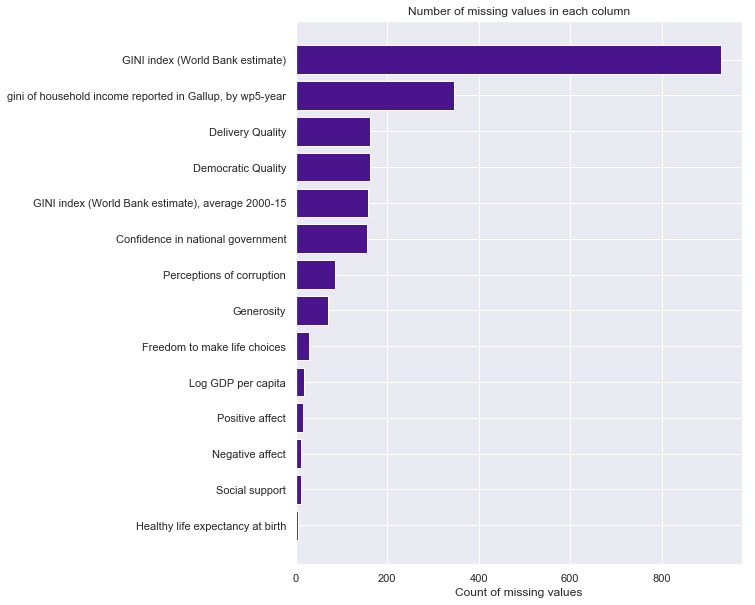

In [64]:
missing_df = dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 1.7
fig, ax = plt.subplots(figsize=(8,10))
rects = ax.barh(ind, missing_df.missing_count.values, color='#4A148C')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

#### We see that, column 'GINI index (World Bank estimate)' has majority of its values as NaN. It would be better to remove this column and not consider it in the visualisation. 

In [65]:
dataset = dataset.drop("GINI index (World Bank estimate)", axis = 1)
dataset = dataset.drop("GINI index (World Bank estimate), average 2000-15", axis = 1)
dataset = dataset.drop("gini of household income reported in Gallup, by wp5-year", axis = 1)
dataset.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



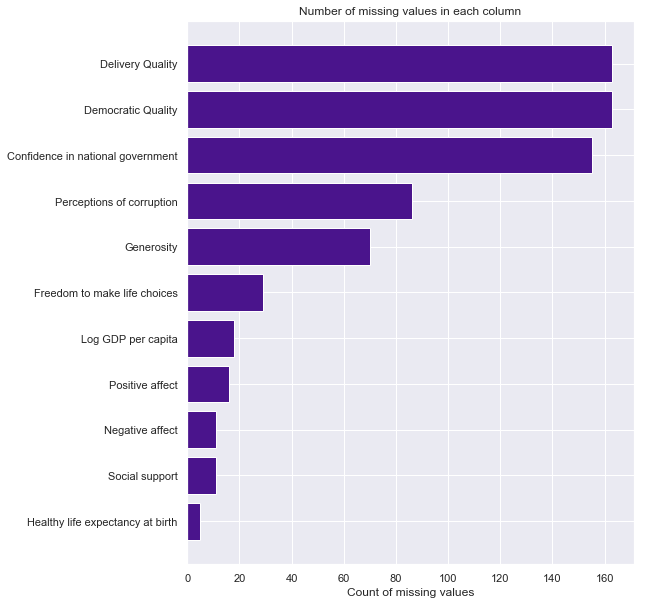

In [66]:
missing_df = dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 1.7
fig, ax = plt.subplots(figsize=(8,10))
rects = ax.barh(ind, missing_df.missing_count.values, color='#4A148C')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

# Changes to make and work on:

>1) Put neutral values for the current missing values in delivery quality, democratic quality, confidence in gov and perceptions of corruption.

>2) Change column name from country to Country, year to Year and so on. Basically make it look more formal.

>3) Do some part of exploratory analysis each and keep adding it!

In [67]:
foriegnvslocal_data = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name = 'foreign>local')
#localvsforiegn
countries = pd.DataFrame(foriegnvslocal_data['Country'])
#countries
foreignlocal = pd.DataFrame(foriegnvslocal_data['Foreign happier than local (foreign-local)'])
#foreignlocal
#foreign = pd.DataFrame(foriegnvslocal_data['Average happiness of foreign born'])
#local = pd.DataFrame(foriegnvslocal_data['Average happiness of locally born'])

In [68]:
foreignhappier_data=foriegnvslocal_data.nlargest(50, 'Foreign happier than local (foreign-local)')
#foreignhappier_data.index = range(50)
foreignhappier = pd.DataFrame(foreignhappier_data['Foreign happier than local (foreign-local)'])
foreignhappiercountries = pd.DataFrame(foreignhappier_data['Country'])
#foreignhappier->graph

In [69]:
localhappier_data=foriegnvslocal_data.nlargest(67, 'Local happier than foreign')
localhappier = pd.DataFrame(localhappier_data['Local happier than foreign'])
localhappiercountries = pd.DataFrame(localhappier_data['Country'])
#localhappier->graph

In [70]:
happinessExplained_data = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name = 'Figure2.2')
happinessExplained_data = happinessExplained_data.drop("Unnamed: 11", axis = 1)
happinessExplained_data = happinessExplained_data.drop("Unnamed: 12", axis = 1)
happinessExplained_data = happinessExplained_data.drop("Unnamed: 13", axis = 1)
happinessExplained_data = happinessExplained_data.drop("Unnamed: 14", axis = 1)
happinessExplained_data = happinessExplained_data.drop("Unnamed: 15", axis = 1)
happinessExplained_data = happinessExplained_data.drop("Unnamed: 16", axis = 1)
happinessExplained_data = happinessExplained_data.drop("Unnamed: 17", axis = 1)
happinessExplained_data = happinessExplained_data.drop("Unnamed: 18", axis = 1)
happinessExplained_data = happinessExplained_data.drop("Unnamed: 19", axis = 1)
happinessExplained_data = happinessExplained_data.drop("Unnamed: 20", axis = 1)
happinessExplained_data = happinessExplained_data.drop("Unnamed: 21", axis = 1)
happinessExplained_data = happinessExplained_data.drop("Unnamed: 22", axis = 1)
happinessExplained_data = happinessExplained_data.drop("Unnamed: 23", axis = 1)
#happinessExplained_data

In [71]:
localhappier_happinessExplained_data = pd.merge(left=happinessExplained_data,right=localhappier_data, left_on='Country', right_on='Country')
foreignhappier_happinessExplained_data = pd.merge(left=happinessExplained_data,right=foreignhappier_data, left_on='Country', right_on='Country')

In [72]:
localhappier_happinessExplained_data = localhappier_happinessExplained_data.drop("Whisker-high_x", axis = 1)
localhappier_happinessExplained_data = localhappier_happinessExplained_data.drop("Whisker-low_x", axis = 1)
localhappier_happinessExplained_data = localhappier_happinessExplained_data.drop("Whisker-high_y", axis = 1)
localhappier_happinessExplained_data = localhappier_happinessExplained_data.drop("Whisker-low_y", axis = 1)
localhappier_happinessExplained_data = localhappier_happinessExplained_data.drop("Foreign happier than local (foreign-local)", axis = 1)
localhappier_happinessExplained_data = localhappier_happinessExplained_data.drop("Average happiness of foreign born", axis = 1)
localhappier_happinessExplained_data = localhappier_happinessExplained_data.drop("Average happiness of locally born", axis = 1)
localhappier_happinessExplained_data = localhappier_happinessExplained_data.drop("Local happier than foreign", axis = 1)

In [73]:
foreignhappier_happinessExplained_data = foreignhappier_happinessExplained_data.drop("Whisker-high_x", axis = 1)
foreignhappier_happinessExplained_data = foreignhappier_happinessExplained_data.drop("Whisker-low_x", axis = 1)
foreignhappier_happinessExplained_data = foreignhappier_happinessExplained_data.drop("Whisker-high_y", axis = 1)
foreignhappier_happinessExplained_data = foreignhappier_happinessExplained_data.drop("Whisker-low_y", axis = 1)
foreignhappier_happinessExplained_data = foreignhappier_happinessExplained_data.drop("Foreign happier than local (foreign-local)", axis = 1)
foreignhappier_happinessExplained_data = foreignhappier_happinessExplained_data.drop("Average happiness of foreign born", axis = 1)
foreignhappier_happinessExplained_data = foreignhappier_happinessExplained_data.drop("Average happiness of locally born", axis = 1)
foreignhappier_happinessExplained_data = foreignhappier_happinessExplained_data.drop("Local happier than foreign", axis = 1)

## Are Foreign born happier than Locals? (50/117 countires)

In [74]:
trace1 = {"x": foreignlocal, 
          "y": countries, 
          "marker": {"color": "pink", "size": 12}, 
          "mode": "markers", 
          "name": "Women", 
          "type": "scatter"
}


data = [trace1]
layout = {"title": "Foreign born happier than Local born", 
          "xaxis": {"title": "average happiness", }, 
          "yaxis": {"title": "Countries"}}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filenmae='foreignlocal')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Foreign born are happier than Local born (50 countries)

In [75]:
##have to make this asc order
trace1 = {"x": foreignhappier, 
          "y": foreignhappiercountries, 
          "marker": {"color": "pink", "size": 12}, 
          "mode": "markers", 
          "name": "foreign happier", 
          "type": "scatter"
}

data = [trace1]
layout = {"title": "Foreigns happier than Local", 
          "xaxis": {"title": "average happiness", }, 
          "yaxis": {"title": "Countries"}}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filenmae='foriegnvslocal_data')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [80]:
X = foreignhappier_happinessExplained_data[['Dystopia', 'GDP', 'Family','Health', 'Freedom','Generosity','Corruption']]
y = foreignhappier_happinessExplained_data['Happiness score']


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [82]:
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (28,) (28, 7)
Test Set  : (20,) (20, 7)


In [83]:
y_train.describe()

count    28.000000
mean      5.049386
std       1.030567
min       3.254200
25%       4.408675
50%       4.755750
75%       5.701075
max       7.632100
Name: Happiness score, dtype: float64

In [84]:
X_train.describe()

,Dystopia,GDP,Family,Health,Freedom,Generosity,Corruption
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,1.886522,0.792330,1.160361,0.523005,0.414418,0.162397,0.110356
std,0.556977,0.380870,0.281613,0.280749,0.153631,0.069707,0.096730
min,0.291651,0.256156,0.372498,0.000000,0.111604,0.042369,0.022260
25%,1.679752,0.428024,1.041809,0.293895,0.306384,0.098836,0.063096
50%,1.918810,0.844692,1.184862,0.546021,0.431252,0.162625,0.087192
75%,2.172341,1.052251,1.374559,0.738825,0.529733,0.215902,0.124280
max,2.854812,1.529294,1.592134,1.008001,0.680633,0.302019,0.456970


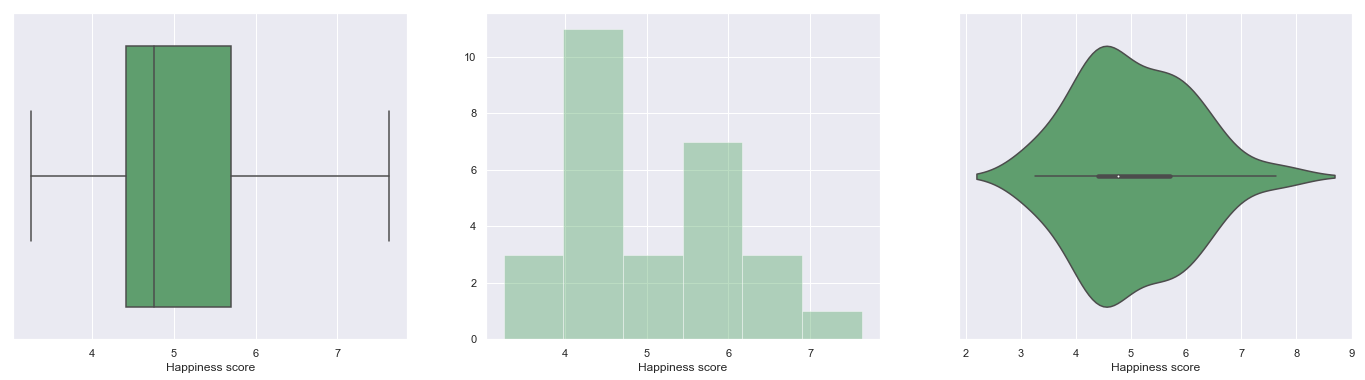

In [85]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(y_train, orient = "h", ax = axes[0], color = "g")
sb.distplot(y_train, kde = False, ax = axes[1], color = "g")
sb.violinplot(y_train, ax = axes[2], color = "g")

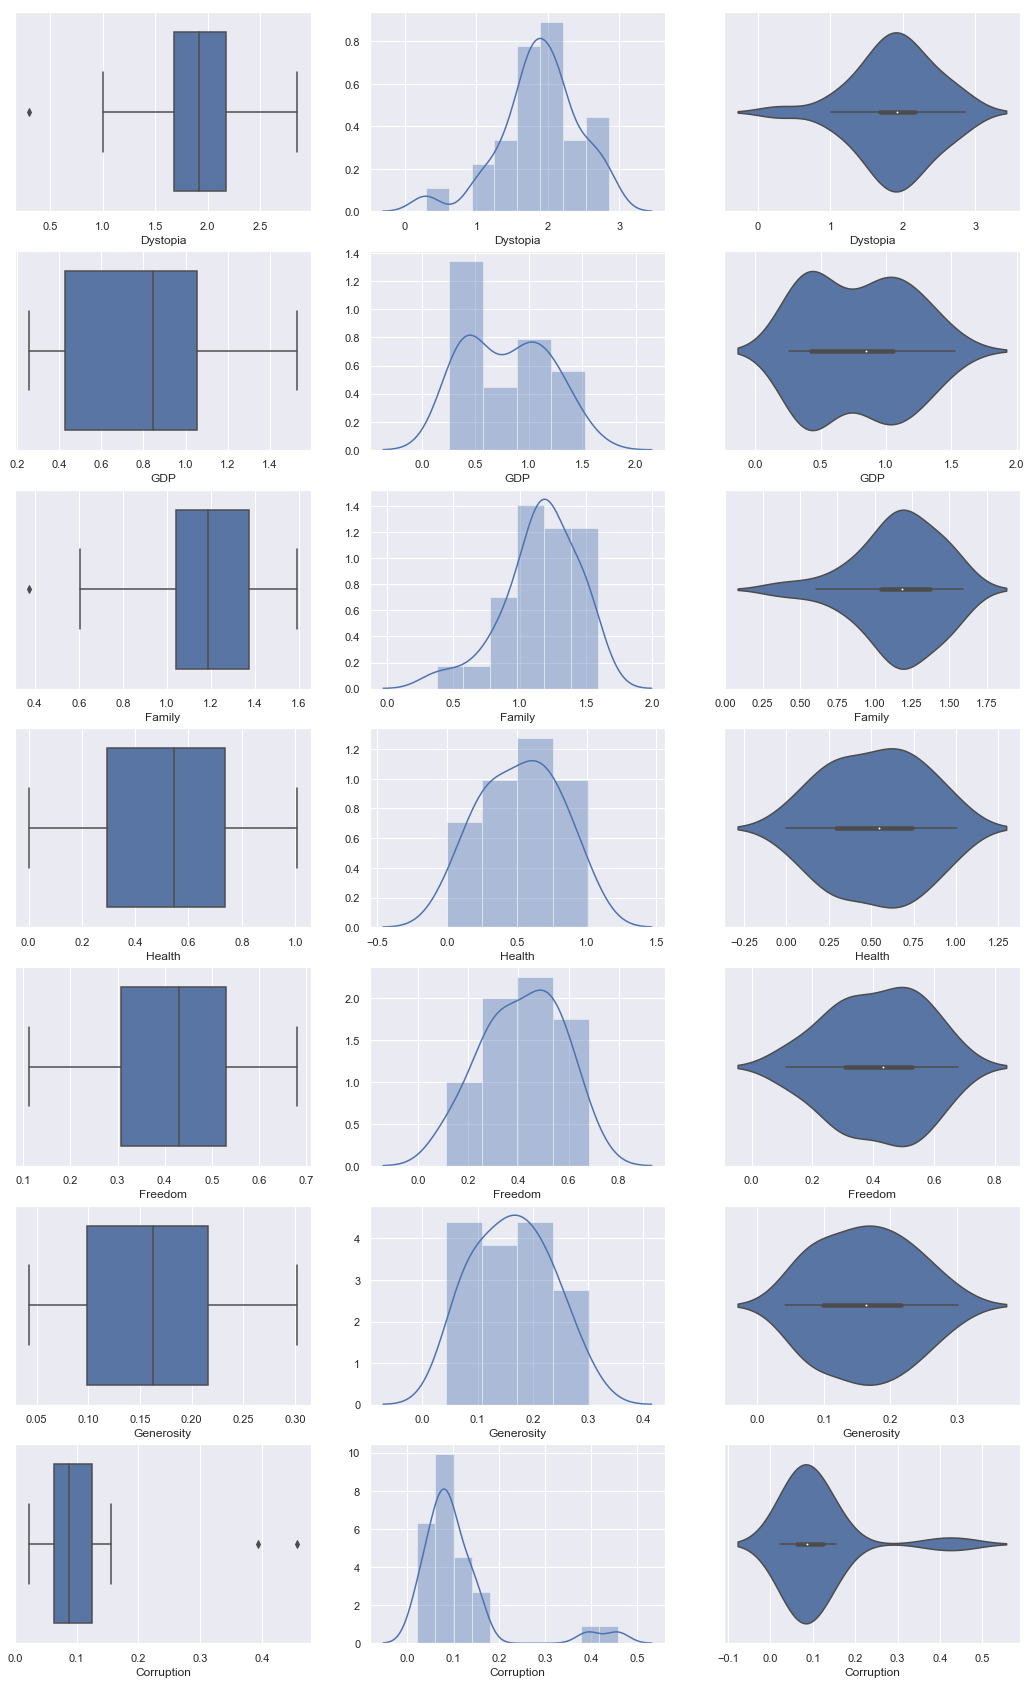

In [86]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(7, 3, figsize=(18, 30))

count = 0
for var in X_train:
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

In [87]:
# Correlation between Response and the Predictors
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
trainDF = pd.concat([y_train, X_train], axis = 1, join_axes = [y_train.index])

#f, axes = plt.subplots(1, 1, figsize=(12, 8))
#sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

corr_matrix_happy = trainDF.corr()
trace_corr_happy = go.Heatmap(z=np.array(corr_matrix_happy), x=corr_matrix_happy.columns, y=corr_matrix_happy.columns)
data_happy=[trace_corr_happy]
iplot(data_happy)

In [88]:
# Relationship between Response and the Predictors !! very small!!
#trainDF = pd.concat([y_train, X_train], axis = 1, join_axes = [y_train.index])
#sb.pairplot(data = trainDF)

Intercept of Regression 	: b =  [4.92701729e-05]
Coefficients of Regression 	: a =  [[0.99999217 1.00001823 0.99995245 1.00001306 1.00001262 0.99996693
  0.99998797]]

   Predictors  Coefficients
0    Dystopia      0.999992
1         GDP      1.000018
2      Family      0.999952
3      Health      1.000013
4     Freedom      1.000013
5  Generosity      0.999967
6  Corruption      0.999988



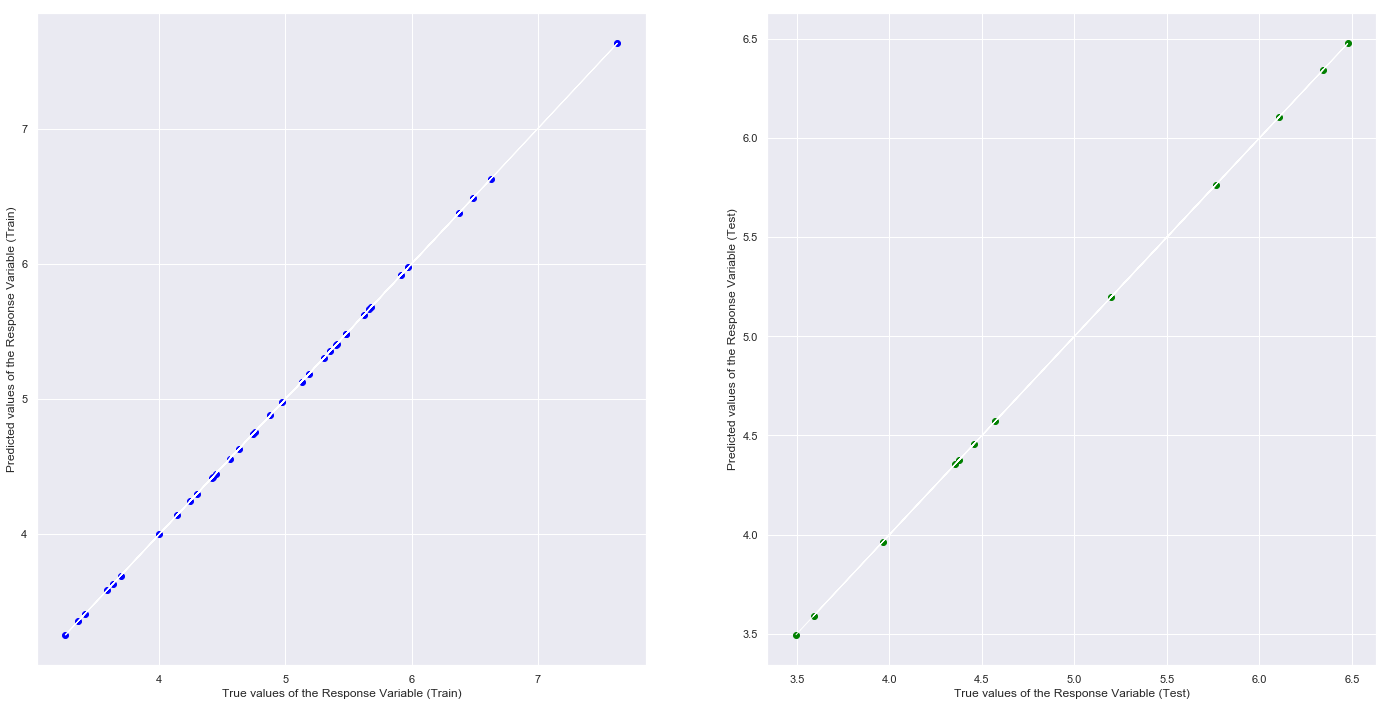

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9999999993401015
Mean Squared Error (MSE) 	: 6.569460202161186e-10

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9999999989044892
Mean Squared Error (MSE) 	: 1.1222727668511852e-09



In [90]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
X = foreignhappier_happinessExplained_data[['Dystopia', 'GDP', 'Family',
               'Health', 'Freedom','Generosity','Corruption']]
y = pd.DataFrame(foreignhappier_happinessExplained_data['Happiness score'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Local born are happier than Foreign born (67 countries)

In [95]:
##have to make this asc order
trace1 = {"x": localhappier, 
          "y": localhappiercountries, 
          "marker": {"color": "pink", "size": 12}, 
          "mode": "markers", 
          "name": "local happier", 
          "type": "scatter"
}


data = [trace1]
layout = {"title": "Locals happier than Foreign", 
          "xaxis": {"title": "average happiness", }, 
          "yaxis": {"title": "Countries"}}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filenmae='foriegnvslocal_data')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [103]:
X = localhappier_happinessExplained_data[['Dystopia', 'GDP', 'Family','Health', 'Freedom','Generosity','Corruption']]
y = localhappier_happinessExplained_data['Happiness score']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [105]:
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (39,) (39, 7)
Test Set  : (26,) (26, 7)


In [106]:
y_train.describe()

count    39.000000
mean      5.995656
std       1.112321
min       3.461900
25%       5.240950
50%       6.083400
75%       7.024400
max       7.593700
Name: Happiness score, dtype: float64

In [107]:
X_train.describe()

,Dystopia,GDP,Family,Health,Freedom,Generosity,Corruption
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1.995000,1.099430,1.345131,0.721060,0.486559,0.199836,0.148640
std,0.490648,0.316959,0.263364,0.209626,0.161253,0.107448,0.120281
min,0.643622,0.321773,0.381641,0.047720,0.088277,0.000000,0.000326
25%,1.716649,0.880750,1.272188,0.638099,0.415044,0.109491,0.052569
50%,2.001663,1.196844,1.458894,0.748003,0.532673,0.201042,0.106181
75%,2.319503,1.339786,1.521807,0.878151,0.615604,0.282675,0.275957
max,2.923021,1.649054,1.600625,1.029650,0.686420,0.375909,0.388840


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



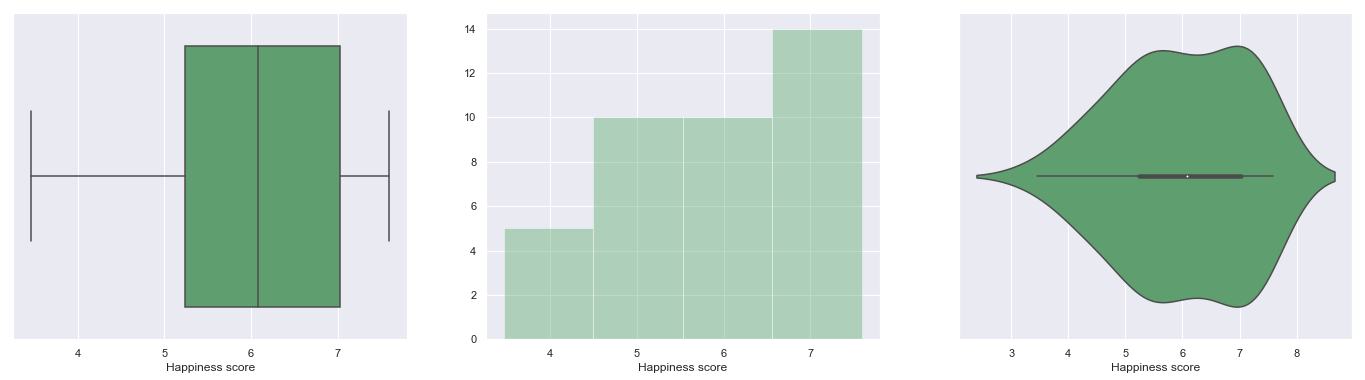

In [108]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(y_train, orient = "h", ax = axes[0], color = "g")
sb.distplot(y_train, kde = False, ax = axes[1], color = "g")
sb.violinplot(y_train, ax = axes[2], color = "g")

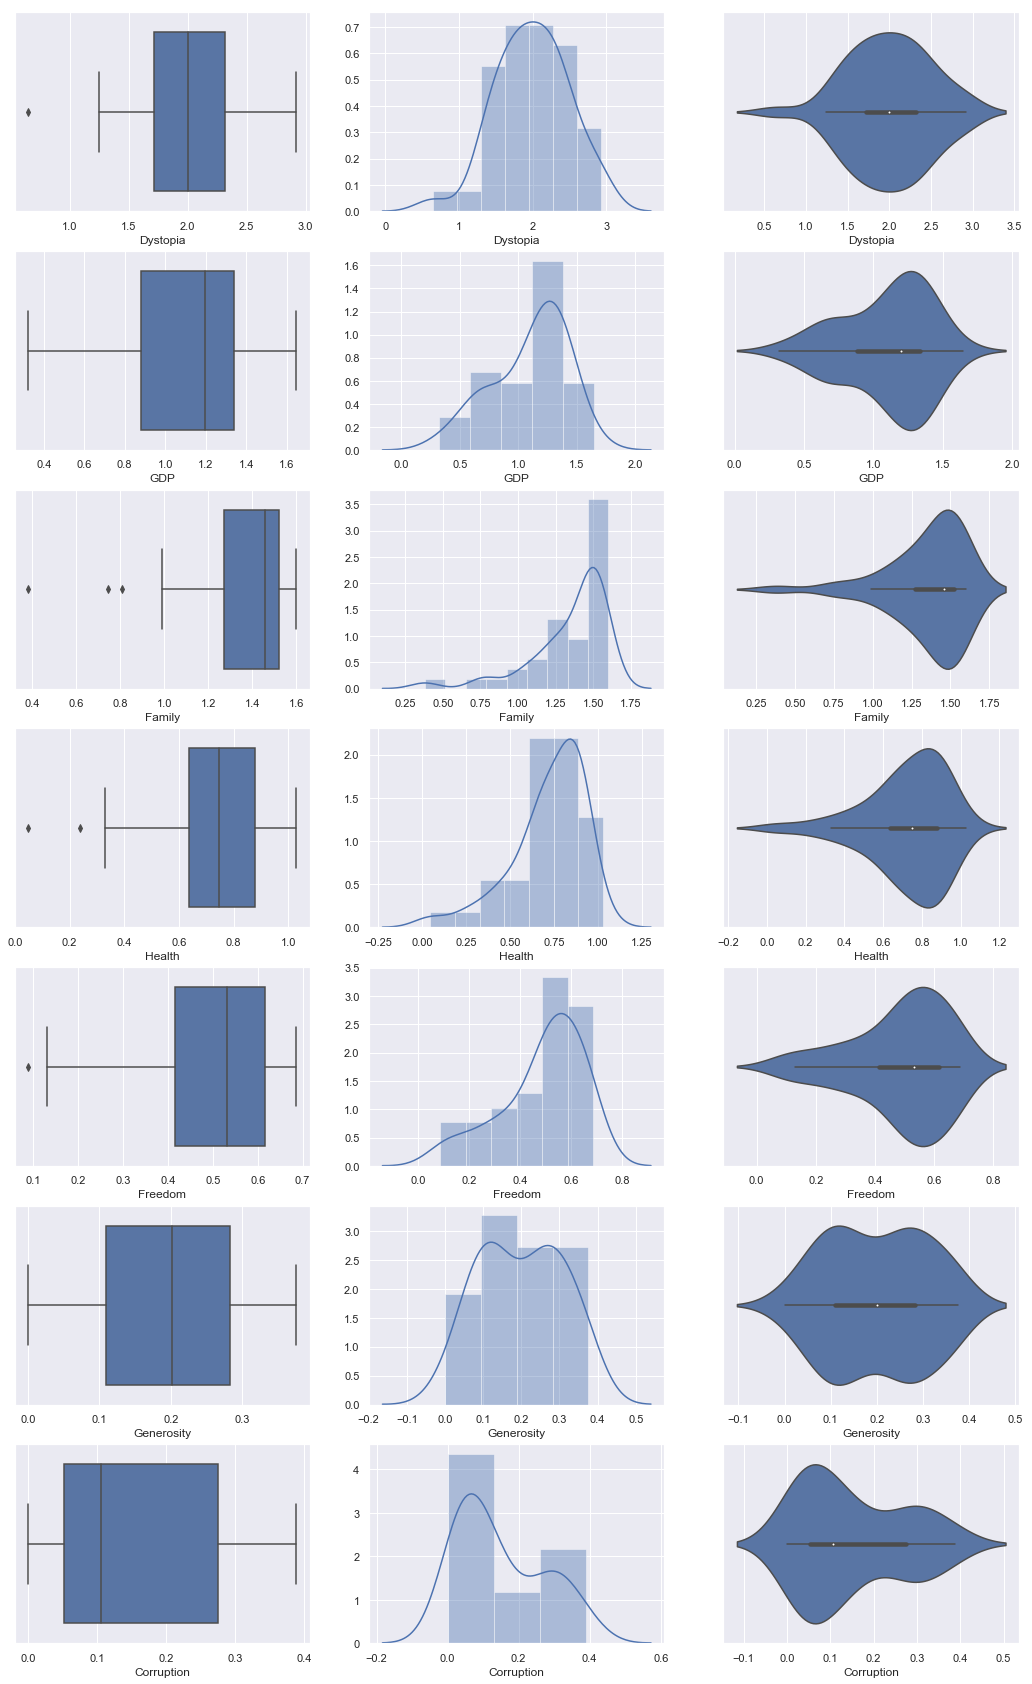

In [109]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(7, 3, figsize=(18, 30))

count = 0
for var in X_train:
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

In [110]:
trainDF = pd.concat([y_train, X_train], axis = 1, join_axes = [y_train.index])

#f, axes = plt.subplots(1, 1, figsize=(12, 8))
#sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
corr_matrix_happy = trainDF.corr()
trace_corr_happy = go.Heatmap(z=np.array(corr_matrix_happy), x=corr_matrix_happy.columns, y=corr_matrix_happy.columns)
data_happy=[trace_corr_happy]
iplot(data_happy)

In [111]:
# Relationship between Response and the Predictors !! very small!!
#trainDF = pd.concat([y_train, X_train], axis = 1, join_axes = [y_train.index])
#sb.pairplot(data = trainDF)

Intercept of Regression 	: b =  [5.2088533e-07]
Coefficients of Regression 	: a =  [[1.0000045  0.99997575 1.00003836 0.99999543 0.9999597  0.9999214
  1.00006408]]

   Predictors  Coefficients
0    Dystopia      1.000004
1         GDP      0.999976
2      Family      1.000038
3      Health      0.999995
4     Freedom      0.999960
5  Generosity      0.999921
6  Corruption      1.000064



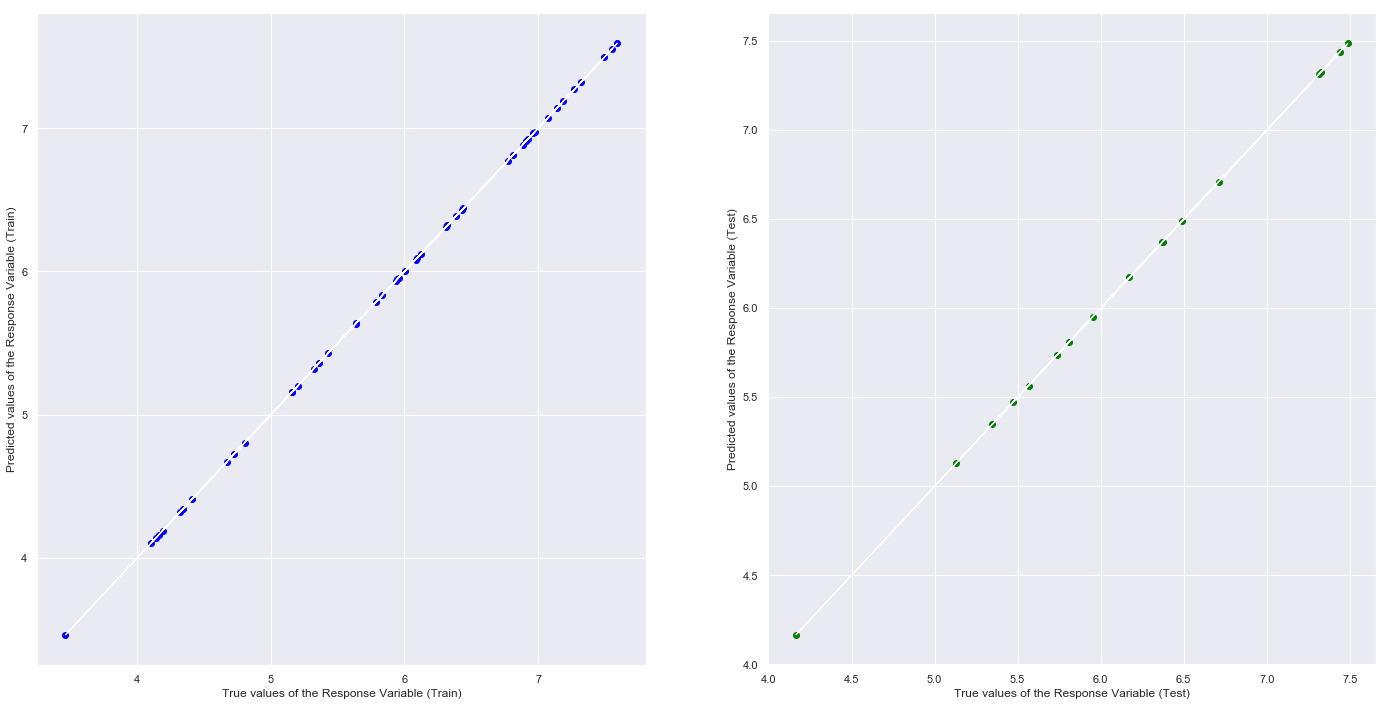

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9999999993677465
Mean Squared Error (MSE) 	: 7.498235419569579e-10

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9999999985304597
Mean Squared Error (MSE) 	: 1.1643345899150382e-09



In [114]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
X = pd.DataFrame(localhappier_happinessExplained_data[['Dystopia', 'GDP', 'Family','Health', 'Freedom','Generosity','Corruption']])
y = pd.DataFrame(localhappier_happinessExplained_data['Happiness score'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()